In [1]:
import kornia as K
from kornia.contrib import FaceDetector, FaceDetectorResult, FaceKeypoint

In [2]:
import os
import decord as de
import torch
from matplotlib import pyplot as plt

DEVICE = 'cuda:0'
FOLDER = 'data'
ctx = de.cpu(0)

In [3]:
def get_frames(path):
    vr = de.VideoReader(path)
    return vr[:].asnumpy()

In [4]:
video_path = os.path.join(FOLDER, sorted(os.listdir(FOLDER))[0])
frames = get_frames(video_path)
frames.shape

(237, 1024, 576, 3)

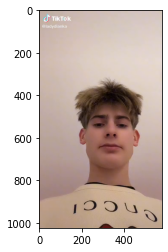

In [5]:
plt.imshow(frames[0])
plt.show()

In [6]:
face_detection = FaceDetector().float().to(DEVICE)

In [7]:
img_tensor = torch.tensor(frames[0:1]).permute(0, 3, 1, 2).float().to(DEVICE)

In [9]:
%%timeit -n 10 -r 2
with torch.no_grad():
    dets = face_detection(img_tensor)

15.9 ms ± 257 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)
